## Groupby
Pandas의 groupby 기능은 데이터를 분할, 적용, 결합하는 과정을 통해 데이터 집계, 변환, 필터링 작업을 효율적으로 수행할 수 있게 해줍니다. 이 기능은 SQL의 GROUP BY 문과 유사하며, 복잡한 데이터 분석 작업을 간단하게 만들어 줍니다.

In [1]:
import pandas as pd
df = pd.read_csv("Data/gapminder.tsv", sep = '\t')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


<Axes: xlabel='year'>

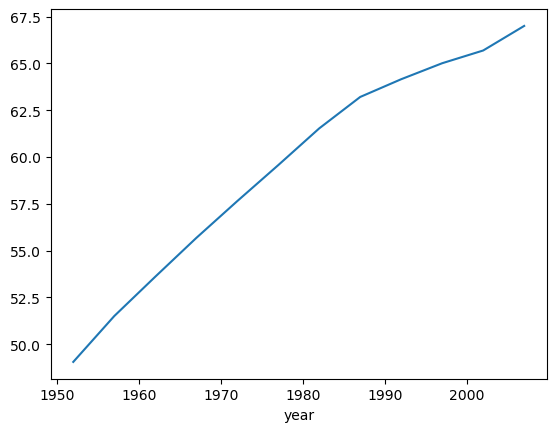

In [3]:
a = df.groupby("year")['lifeExp'].mean()
a.plot()

In [9]:
# 퀴즈 : 대륙별로 국가가 몇 개인지 세어보기.
b = df.groupby(["continent", "year"])['lifeExp'].median()
b.to_excel("result.xlsx")

In [10]:
# count : 중복 허요
df.groupby("continent")['country'].count()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: country, dtype: int64

### 1. 주요 함수들
* mean(): 그룹별 평균 값을 계산합니다.
* sum(): 그룹별 합계를 계산합니다.
* size(): 각 그룹의 크기(행의 개수)를 계산합니다.
* count(): 각 그룹의 non-NA/null 값의 개수를 계산합니다.
* min(), max(): 각 그룹의 최소값과 최대값을 계산합니다.
* describe(): 각 그룹에 대한 기술통계를 요약하여 보여줍니다.

In [5]:
df.groupby("country")['gdpPercap'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Afghanistan,12.0,802.674598,108.202929,635.341351,736.669343,803.483195,852.572136,978.011439
Albania,12.0,3255.366633,1192.351513,1601.056136,2451.300665,3253.238396,3657.893725,5937.029526
Algeria,12.0,4426.025973,1310.337656,2449.008185,3188.737834,4853.855903,5386.369921,6223.367465
Angola,12.0,3607.100529,1165.900251,2277.140884,2724.676675,3264.628814,4401.265373,5522.776375
Argentina,12.0,8955.553783,1862.583151,5911.315053,7823.006272,9068.784401,9602.035579,12779.379640
...,...,...,...,...,...,...,...,...
Vietnam,12.0,1017.712615,567.482251,605.066492,693.697595,742.793140,1088.241554,2441.576404
West Bank and Gaza,12.0,3759.996781,1716.840614,1515.592329,2537.025333,3408.120386,4663.415027,7110.667619
"Yemen, Rep.",12.0,1569.274672,609.939160,781.717576,853.237410,1854.630925,2012.538889,2280.769906


In [7]:
a = df.groupby("year")['lifeExp'].mean()
a

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

<Axes: xlabel='year'>

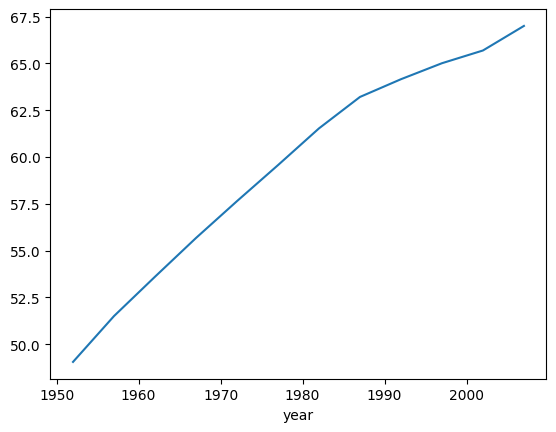

In [8]:
a.plot()

In [6]:
df.groupby(['continent', 'year'])['lifeExp'].mean()

continent  year
Africa     1952    39.135500
           1957    41.266346
           1962    43.319442
           1967    45.334538
           1972    47.450942
           1977    49.580423
           1982    51.592865
           1987    53.344788
           1992    53.629577
           1997    53.598269
           2002    53.325231
           2007    54.806038
Americas   1952    53.279840
           1957    55.960280
           1962    58.398760
           1967    60.410920
           1972    62.394920
           1977    64.391560
           1982    66.228840
           1987    68.090720
           1992    69.568360
           1997    71.150480
           2002    72.422040
           2007    73.608120
Asia       1952    46.314394
           1957    49.318544
           1962    51.563223
           1967    54.663640
           1972    57.319269
           1977    59.610556
           1982    62.617939
           1987    64.851182
           1992    66.537212
           1997    68.02051

### 2. agg 함수
Pandas의 agg 함수는 집계(aggregation)를 위해 사용되며, 매우 유연하고 강력한 기능을 제공합니다. agg 함수는 하나 이상의 집계 연산을 데이터에 적용할 수 있게 하며, 이를 통해 데이터의 요약 통계를 쉽게 얻을 수 있습니다. groupby와 함께 사용될 때 특히 유용하며, 다양한 방식으로 집계를 커스텀할 수 있습니다.

### 3. filter 함수
Pandas의 filter 함수는 DataFrame이나 Series에서 특정 조건을 만족하는 데이터를 선택하기 위해 사용됩니다. 하지만 groupby 객체와 함께 사용될 때, filter는 그룹화된 데이터에 대해 조건에 따라 필터링을 수행하고, 특정 기준을 만족하는 그룹만을 반환합니다. 이 방식은 특정 조건에 따라 전체 데이터 세트에서 일부 그룹을 제외시키고자 할 때 유용합니다.

In [1]:
df.groupby("continent").filter(lambda x : x['lifeExp'].mean() > 50)

NameError: name 'df' is not defined

### 4. transform 함수
Pandas의 transform 함수는 데이터프레임이나 시리즈의 각 요소에 함수를 적용하고, 그 결과를 같은 형태로 반환하는데 사용됩니다. transform은 특히 groupby 객체와 함께 사용될 때 유용하며, 각 그룹에 대해 데이터 변환을 수행한 후 원본 배열과 같은 크기의 결과를 반환합니다. 이는 그룹별로 요약된 값을 각 데이터 포인트에 적용해야 할 때 매우 편리합니다.

In [18]:
def scaler(x):
    return (x - x.mean()) / x.std()

df.groupby("continent")['lifeExp'].transform(scaler)

0      -2.635073
1      -2.506033
2      -2.365698
3      -2.195190
4      -2.020889
          ...   
1699    1.473810
1700    1.258077
1701   -0.224730
1702   -0.970068
1703   -0.587782
Name: lifeExp, Length: 1704, dtype: float64

### 5. idxmax 함수
idxmax() 함수는 Pandas의 Series나 DataFrame 객체에서 값이 최대인 항목의 인덱스를 반환합니다. 이 함수는 수치 데이터를 다룰 때 유용하며, 최댓값을 가지는 요소의 위치를 찾고자 할 때 사용됩니다. idxmax()는 기본적으로 열 방향(axis=0)으로 동작하며, 행 방향(axis=1)으로의 작동도 가능합니다. 반대인 idxmin() 함수도 있습니다.

### 연습문제

In [19]:
data = {
    'Company': ['Google', 'Google', 'Microsoft', 'Microsoft', 'Facebook', 'Facebook', 'Apple', 'Apple'],
    'Person': ['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah', 'John', 'Emma'],
    'Sales': [200, 120, 340, 124, 243, 350, 300, 320],
    'Country': ['USA', 'USA', 'USA', 'Canada', 'Canada', 'USA', 'USA', 'Canada']
}

df = pd.DataFrame(data)
df

,Company,Person,Sales,Country
0,Google,Sam,200,USA
1,Google,Charlie,120,USA
2,Microsoft,Amy,340,USA
3,Microsoft,Vanessa,124,Canada
4,Facebook,Carl,243,Canada
5,Facebook,Sarah,350,USA
6,Apple,John,300,USA
7,Apple,Emma,320,Canada


1. 회사별로 매출(Sales)의 총합을 계산하세요.

2. 국가(Country)별로 몇 명의 직원(Person)이 있는지 계산하세요.

In [21]:
df.groupby("Country")['Person'].count()

Country
Canada    3
USA       5
Name: Person, dtype: int64

3. 각 회사에서 가장 높은 매출(Sales)을 기록한 사람(Person)의 이름과 해당 매출액을 출력하세요.

In [24]:
idx = df.groupby("Company")['Sales'].idxmax()
df.iloc[idx]

,Company,Person,Sales,Country
7,Apple,Emma,320,Canada
5,Facebook,Sarah,350,USA
0,Google,Sam,200,USA
2,Microsoft,Amy,340,USA


4. 회사별로 평균 매출(Sales)보다 높은 매출을 기록한 모든 기록을 필터링하세요.

In [29]:
df[df.groupby('Company')['Sales'].transform(lambda x: x > x.mean())]

,Company,Person,Sales,Country
0,Google,Sam,200,USA
2,Microsoft,Amy,340,USA
5,Facebook,Sarah,350,USA
7,Apple,Emma,320,Canada


5. 모든 회사의 매출(Sales) 중앙값을 계산하세요.

In [32]:
df.groupby("Company")['Sales'].median()

Company
Apple        310.0
Facebook     296.5
Google       160.0
Microsoft    232.0
Name: Sales, dtype: float64

6. 회사별로 매출(Sales)의 최소값과 최대값의 차이(범위)를 계산하세요.

In [33]:
def sales_range(x):
    return x.max() - x.min()

df.groupby("Company")['Sales'].agg(sales_range)

Company
Apple         20
Facebook     107
Google        80
Microsoft    216
Name: Sales, dtype: int64

7. 국가별로 각 회사의 평균 매출(Sales)을 계산하세요.

8. 'USA' 국가에서 각 회사의 매출(Sales) 총합을 계산하세요.

9. 각 회사별로 매출(Sales)을 기준으로 내림차순 정렬하세요. (단일 회사 내에서의 정렬)

10. 모든 회사의 매출(Sales) 평균을 계산하고, 이 평균을 초과하는 매출을 기록한 회사와 직원, 매출액을 출력하세요.

In [35]:
overall_sales_mean = df['Sales'].mean()
df[df['Sales'] > overall_sales_mean]

,Company,Person,Sales,Country
2,Microsoft,Amy,340,USA
5,Facebook,Sarah,350,USA
6,Apple,John,300,USA
7,Apple,Emma,320,Canada
